In [88]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
!pip install wordcloud
from wordcloud import WordCloud
import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
#binary olduğu zaman BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import Word,TextBlob
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import confusion_matrix

In [3]:
df=pd.read_csv("spam.csv",encoding="iso-8859-1")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
del df["Unnamed: 2"]

In [6]:
df.head()

,v1,v2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN


In [7]:
del df["Unnamed: 3"]
del df["Unnamed: 4"]
#df.drop("Unnamed: 2","Unnamed: 3","Unnamed: 4",inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.columns=["Class","Text"]

In [10]:
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df["label"]=df.Class.map({"ham":0,"spam":1})

In [13]:
df.head()


,Class,Text,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [14]:
df.Class.value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [15]:
df.Class.value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: Class, dtype: float64

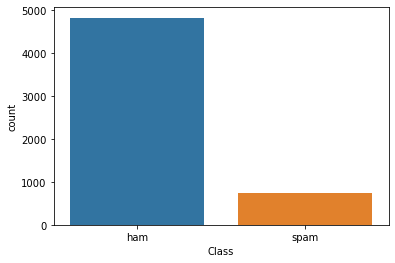

In [19]:
sns.countplot(data=df,x="Class");

In [24]:
df["Text"]=df["Text"].str.replace("[^\w\s]"," ")#noktalama işaretleri kaldırıldı

In [26]:
df["Text"]=df["Text"].str.lower()#küçük harf

In [30]:
df["Text"]=df["Text"].str.replace("[\d+]"," ")#rakamlar kaldırıldı

In [31]:
df

,Class,Text,label
0,ham,g unti juron point crazy availabl onl i bug...,0
1,ham,o lar jokin wi oni,0
2,spam,fre entr i wkl com t wi f cu fina tkt s ma...,1
3,ham,du sa s earl hor alread the say,0
4,ham,na don thin h goe t usf h live aroun her th...,0
...,...,...,...
5567,spam,thi i th n tim w hav trie contac u hav wo ...,1
5568,ham,wil ì goin t esplanad f home,0
5569,ham,pity wa i moo fo that so an othe suggest...,0
5570,ham,th gu di som bitchin bu acte lik i b interes...,0


In [34]:
df["Text"]=df["Text"].str.replace("\n","").str.replace("\r","")#satır sonları

In [35]:
df

,Class,Text,label
0,ham,g unti juron point crazy availabl onl i bug...,0
1,ham,o lar jokin wi oni,0
2,spam,fre entr i wkl com t wi f cu fina tkt s ma...,1
3,ham,du sa s earl hor alread the say,0
4,ham,na don thin h goe t usf h live aroun her th...,0
...,...,...,...
5567,spam,thi i th n tim w hav trie contac u hav wo ...,1
5568,ham,wil ì goin t esplanad f home,0
5569,ham,pity wa i moo fo that so an othe suggest...,0
5570,ham,th gu di som bitchin bu acte lik i b interes...,0


In [54]:
def woc(data,bgcolor):
    wc=WordCloud(background_color=bgcolor,max_words=100).generate(" ".join(data))#satırlar birleştirilip metin haline etirildi
    plt.figure(figsize=(10,10))
    plt.imshow(wc)
    plt.axis("off")

In [55]:
ham=df.query("Class=='ham'")["Text"]

In [56]:
ham

0       g unti juron point  crazy   availabl onl i bug...
1                               o lar    jokin wi  oni   
3                 du sa s earl hor      alread the say   
4       na  don  thin h goe t usf  h live aroun her th...
6       eve m brothe i no lik t spea wit me  the trea ...
                              ...                        
5565                                           hu  lei   
5568                       wil ì  goin t esplanad f home 
5569    pity    wa i moo fo that  so   an othe suggest...
5570    th gu di som bitchin bu  acte lik i  b interes...
5571                               rofl  it tru t it name
Name: Text, Length: 4825, dtype: object

In [57]:
spam=df.query("Class=='spam'")["Text"]

In [58]:
spam

2       fre entr i   wkl com t wi f cu fina tkt   s ma...
5       freems he ther darlin it  bee  week  no an n w...
8       winner   a  value networ custome yo hav bee se...
9       ha you mobil   month o more    entitle t updat...
11      si chance t wi cash  fro    t       pound txt ...
                              ...                        
5537    wan explici se i   secs  rin            now  c...
5540    aske  mobil i     chatline incl i fre mins  in...
5547    ha you contrac mobil   mnths  lates motorola  ...
5566    reminde fro o   t ge     pound fre cal credi a...
5567    thi i th  n tim w hav trie  contac u   hav wo ...
Name: Text, Length: 747, dtype: object

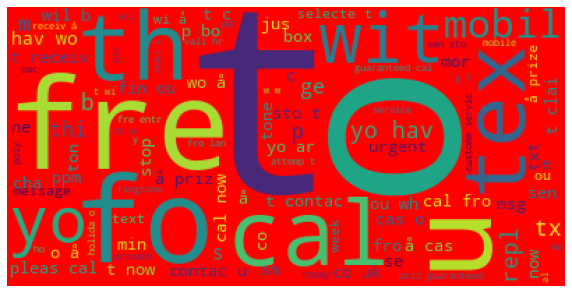

In [59]:
woc(spam,"red")

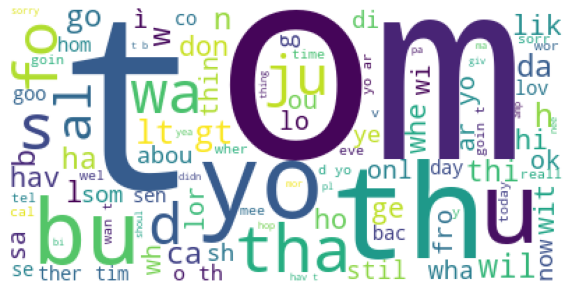

In [60]:
woc(ham,"white")

In [62]:
ham_freq=nltk.FreqDist(ham)

In [63]:
ham_freq

FreqDist({'sorry  i l cal later': 30, ' can pic th phon righ now  pl sen  message': 12, 'ok   ': 10, 'we u lovabl bcum angr wi u  dn tak i seriously   co bein angr i  mos childis  tru wa o showin dee affection  car  luv    kettod manda    hav nic da da ': 4, 'you opinio abou me     ove    jad    kusruth    lovabl    silen    sp characte    no mature    stylis    simpl pl reply  ': 4, ' wonder i m worl  t yo  t u styl  t u smil  t u personalit  r u natur  n u sm an  s  u lovel friendship      goo mornin dear ': 4, 'sa thi slowly   god  lov yo  amp   nee you clea m hear wit you blood sen thi t te specia peopl  amp    miracl tomorrow  d it pls pl d it   ': 4, 'ok': 4, 'ok ': 4, 'okie': 4, ...})

In [64]:
spam_freq=nltk.FreqDist(spam)

In [65]:
spam_freq

FreqDist({'pleas cal ou custome servic representativ o freephon            betwee  am   p a yo hav wo  guarantee å     cas o å     prize ': 4, ' hav  secre admire wh i lookin  mak contac wit u fin ou wh the r revea wh think u s special cal o            ': 4, 'a  value customer   a please t advis yo tha followin recen revie o you mo no  yo ar awarde wit  å     bonu prize  cal            ': 3, 'hm bonu specia    pound o genuin hm voucher t b won  jus answe  eas questions  pla now  sen hm t      mor info www    percent real com': 3, 'decembe only  ha you mobil   mths   yo ar entitle t updat t th lates colou camer mobil fo free  cal th mobil updat c fre o            ': 3, 'loa fo an purpos å      å         homeowner   tenant welcome  hav yo bee previousl refused  w ca stil help  cal fre            o tex bac  help ': 3, 'private  you     accoun statemen fo            show    un redeeme s  i  m  points  cal            identifie code       expire         ': 3, 'private  you     accoun stateme

In [66]:
ham.str.split()

0       [g, unti, juron, point, crazy, availabl, onl, ...
1                                [o, lar, jokin, wi, oni]
3                [du, sa, s, earl, hor, alread, the, say]
4       [na, don, thin, h, goe, t, usf, h, live, aroun...
6       [eve, m, brothe, i, no, lik, t, spea, wit, me,...
                              ...                        
5565                                            [hu, lei]
5568                 [wil, ì, goin, t, esplanad, f, home]
5569    [pity, wa, i, moo, fo, that, so, an, othe, sug...
5570    [th, gu, di, som, bitchin, bu, acte, lik, i, b...
5571                         [rofl, it, tru, t, it, name]
Name: Text, Length: 4825, dtype: object

In [71]:
x_train,x_test,y_train,y_test=train_test_split(df["Text"],df["label"],random_state=42)

In [82]:
vect=CountVectorizer(lowercase=True,stop_words="english",)#lowercase le harfleri küçülttük ama aslında gerek yoktu daha önce  küçülttük
#stop_words ile gereksiz kelimeleri atık
x_train_dtm=vect.fit_transform(x_train)
print(x_train_dtm)
x_test_dtm=vect.transform(x_test)

  (0, 813)	1
  (0, 820)	1
  (1, 5829)	1
  (1, 2574)	1
  (1, 2586)	1
  (1, 3043)	1
  (1, 6434)	1
  (1, 2710)	1
  (1, 5232)	1
  (1, 5970)	1
  (2, 3856)	1
  (2, 6066)	1
  (2, 168)	1
  (2, 5772)	1
  (2, 5882)	1
  (2, 6502)	1
  (2, 5812)	1
  (2, 5883)	1
  (2, 1143)	1
  (2, 4089)	1
  (2, 2591)	1
  (2, 1998)	1
  (2, 5946)	1
  (2, 1973)	1
  (2, 180)	1
  :	:
  (4174, 4306)	1
  (4174, 2397)	1
  (4174, 843)	1
  (4174, 1064)	1
  (4174, 523)	1
  (4174, 5301)	1
  (4174, 2703)	1
  (4174, 2724)	1
  (4175, 820)	1
  (4175, 5415)	1
  (4175, 3173)	1
  (4176, 2591)	1
  (4176, 4428)	1
  (4176, 5421)	1
  (4176, 4689)	1
  (4176, 2216)	1
  (4176, 5420)	1
  (4177, 5112)	1
  (4177, 6012)	1
  (4177, 3012)	1
  (4178, 2574)	1
  (4178, 2397)	1
  (4178, 3598)	1
  (4178, 2039)	1
  (4178, 6632)	1


In [83]:
print(x_test)

3245    funn fac nobod teache volcanoe  erupt  tsunami...
944      sen m score t sopha an  ha t d secondar appli...
1044    w kno someon wh yo kno tha fancie you  cal    ...
2484    onl i yo promis you gettin ou a soo a yo can  ...
812     congratulation u awarde eithe å    o c gif vou...
                              ...                        
668                                hav  goo evening  ttyl
218                              hav t tak exa wit marc  
5536         aiya o wa a lon a go improv ca alread wat   
1657    s   i w hav on goo partnershi goin w wil tak l...
3875                                   di  ge tha message
Name: Text, Length: 1393, dtype: object


In [84]:
tf=pd.DataFrame(x_train_dtm.toarray(),columns=vect.get_feature_names()) #vektör haline çevirdk sadece 0 olmayanlar göründü
tf.head()
#6802 farklı kelime kullanılmış

,___,aa,aah,aaoooorigh,aathi,ab,abbey,abeg,abel,aberdeen,...,åôrent,ì_,ìï,û_,û_thank,ûª,ûªv,ûï,ûïharr,ûówel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
#Naive Bayes
nb=MultinomialNB()
nb.fit(x_train_dtm,y_train)
y_pred_class=nb.predict(x_test_dtm)
print(metrics.accuracy_score(y_test,y_pred_class))

0.9770279971284996


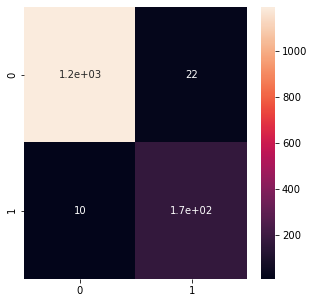

In [92]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_pred_class,y_test), annot=True);


In [93]:
lr=LogisticRegression()
lr.fit(x_train_dtm,y_train)
y_pred_class=lr.predict(x_test_dtm)
print(metrics.accuracy_score(y_test,y_pred_class))

0.9734386216798278


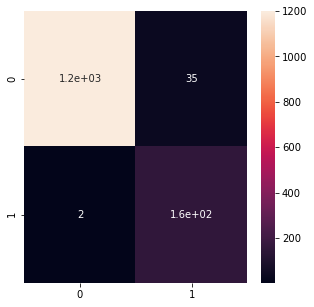

In [94]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_pred_class,y_test), annot=True);